##Beer Reviews Data Analysis using Machine Learning and exploratory data visulization and analysis techniques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as plgo
import plotly.figure_factory as plff

In [ ]:
reviews = pd.read_csv('drive/My Drive/beer_reviews.csv')
reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


### About Dataset

In [ ]:
reviews.shape

(1586614, 13)

There are almost 1.5 million entries on the reviews of the beer and have 13 attributes repreesenting the data

In [ ]:
reviews.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [ ]:
print('Information about the columns; type,entries,missing value info:  \n')
print(reviews.info())

Information about the columns; type,entries,missing value info:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 1

In [ ]:
## Counting unqiueness by Brewery/Company
print('No of unique brewery by name:', reviews.brewery_name.nunique())
print('No of unique brewery by ids:',reviews.brewery_id.nunique())

No of unique brewery by name: 5742
No of unique brewery by ids: 5840


In [ ]:
## Counting uniqueness by Beer
print('No of unique beer by name:', reviews.beer_name.nunique())
print('No of unique beer by ids:',reviews.beer_beerid.nunique())

No of unique beer by name: 56857
No of unique beer by ids: 66055


In [ ]:
## Counting number of users,reviewed the beer
print('No of unique users, reviewing the given beers: ',reviews.review_profilename.nunique())

No of unique users, reviewing the given beers:  33387


So, in nutshell, These dataset contains 1.5 million reviews of around more than 60 thousand beers and which are considered from more than 5 thousand breweries

### Data Preprocessing

Handling Missing values

In [ ]:
print("Missing values in Dataset: /n", reviews.isnull().sum())

Missing values in Dataset: /n brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


In [ ]:
reviews = reviews.dropna(axis = 0)
print("After removing the missing entries in dataset: /n", reviews.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB
After removing the missing entries in dataset: /n None


Handling Duplicate values

In [ ]:
print('User reviewed one beer more than ones,categorised by beer name: \n', 
      reviews.loc[reviews.duplicated(['review_profilename','beer_name'],keep= False)])

User reviewed one beer more than ones,categorised by beer name: 
          brewery_id                 brewery_name  ...  beer_abv  beer_beerid
187            1075      Caldera Brewing Company  ...       5.5        25414
199            1075      Caldera Brewing Company  ...       5.5        25414
389            1075      Caldera Brewing Company  ...       6.1        10784
426            1075      Caldera Brewing Company  ...       6.1        10784
804            1075      Caldera Brewing Company  ...       5.4        10785
...             ...                          ...  ...       ...          ...
1586560       14359  The Defiant Brewing Company  ...       6.2        35185
1586563       14359  The Defiant Brewing Company  ...       6.2        35185
1586564       14359  The Defiant Brewing Company  ...       6.2        35185
1586580       14359  The Defiant Brewing Company  ...       5.5        36388
1586581       14359  The Defiant Brewing Company  ...       5.5        36388

[41425 ro

In [ ]:
print('User reviewed one beer more than ones,categorised by beer ids: \n',
      reviews.loc[reviews.duplicated(['review_profilename','beer_beerid'],keep=False)])

User reviewed one beer more than ones,categorised by beer ids: 
          brewery_id                 brewery_name  ...  beer_abv  beer_beerid
187            1075      Caldera Brewing Company  ...      5.50        25414
199            1075      Caldera Brewing Company  ...      5.50        25414
389            1075      Caldera Brewing Company  ...      6.10        10784
426            1075      Caldera Brewing Company  ...      6.10        10784
804            1075      Caldera Brewing Company  ...      5.40        10785
...             ...                          ...  ...       ...          ...
1585815        3835          Drake's Brewing Co.  ...      8.75        12172
1586013        3835          Drake's Brewing Co.  ...      5.20        25095
1586027        3835          Drake's Brewing Co.  ...      5.20        25095
1586580       14359  The Defiant Brewing Company  ...      5.50        36388
1586581       14359  The Defiant Brewing Company  ...      5.50        36388

[28379 row

In [ ]:
## Sorting the ratings with descending order,so that with removing duplicates for beer reviews,user gave highest ratings entry can be kept
reviews = reviews.sort_values('review_overall',ascending= False)

In [ ]:
## Removing the duplicates
reviews = reviews.drop_duplicates(subset=['review_profilename','beer_name'],keep = 'first')
reviews = reviews.drop_duplicates(subset=['review_profilename','beer_beerid'],keep = 'first')
reviews.shape

(1496263, 13)

In [ ]:
round(reviews.describe())

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1496263.0,1.496263e+06,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0,1496263.0
mean,3069.0,1.225547e+09,4.0,4.0,4.0,4.0,4.0,7.0,21445.0
std,5542.0,7.574836e+07,1.0,1.0,1.0,1.0,1.0,2.0,21801.0
min,1.0,8.843904e+08,0.0,1.0,0.0,1.0,1.0,0.0,5.0
25%,141.0,1.175877e+09,4.0,4.0,4.0,4.0,4.0,5.0,1655.0
50%,413.0,1.240543e+09,4.0,4.0,4.0,4.0,4.0,6.0,12962.0
75%,2250.0,1.289228e+09,4.0,4.0,4.0,4.0,4.0,8.0,39286.0
max,28003.0,1.326285e+09,5.0,5.0,5.0,5.0,5.0,58.0,77316.0


In the dataset, review time column has datatype of int64, converting it in form of datetime format

In [ ]:
reviews.review_time = pd.to_datetime(reviews.review_time,unit = 's')
reviews.dtypes

brewery_id                     int64
brewery_name                  object
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename            object
beer_style                    object
review_palate                float64
review_taste                 float64
beer_name                     object
beer_abv                     float64
beer_beerid                    int64
dtype: object

### Data visualization and analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdad84f8d30>,
      dtype=object)

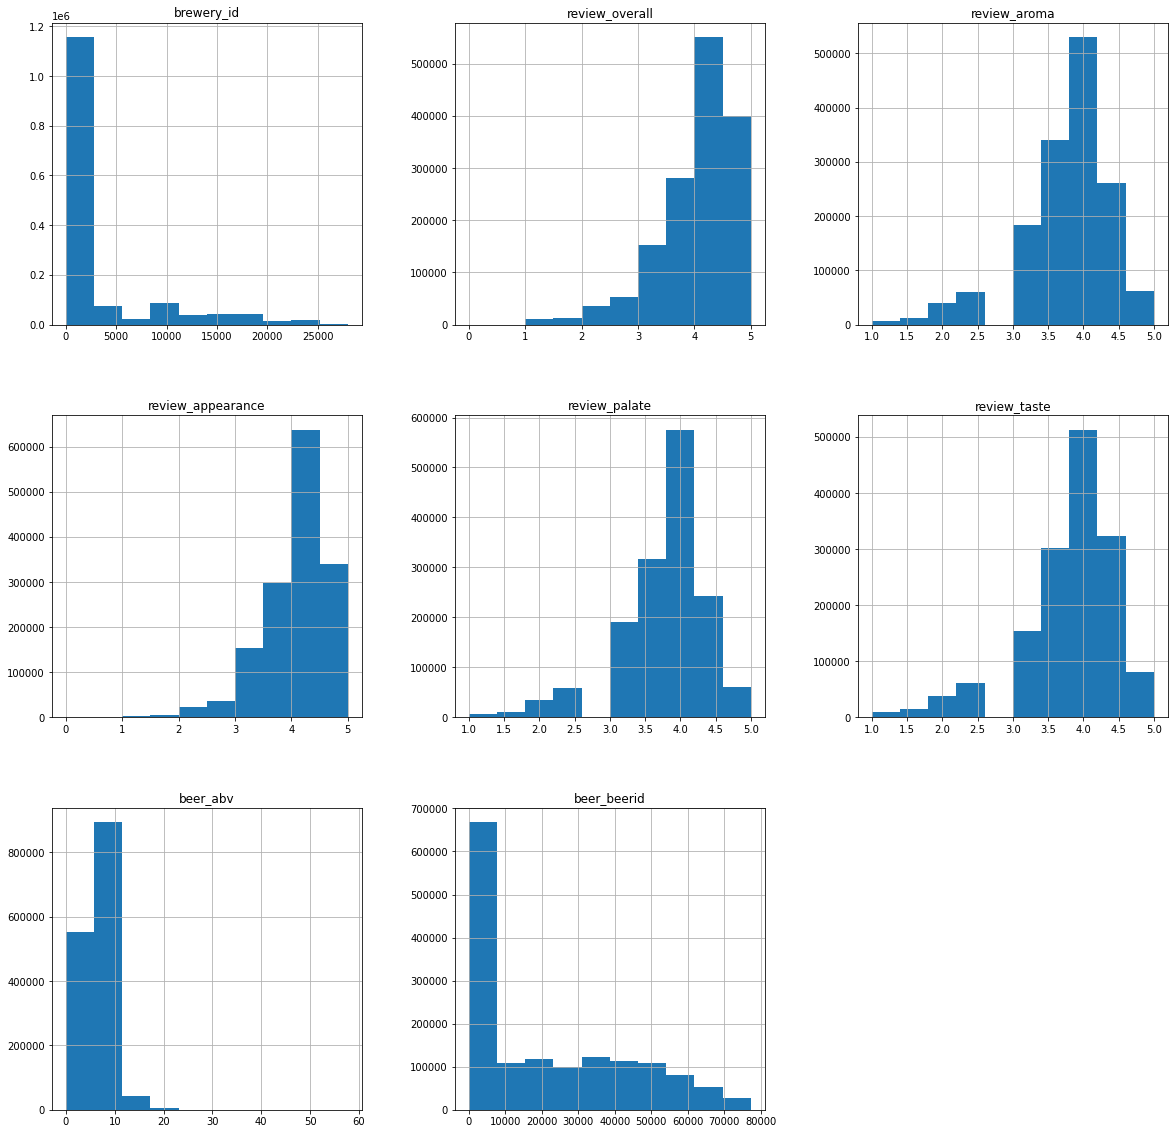

In [ ]:
reviews.hist(figsize = (20,20))

### Top 10 popular Brewaries w.r.t Reviews counts

In [ ]:
popular_brewery = reviews.groupby('brewery_name').brewery_name.count()
popular_brewery = popular_brewery.sort_values(ascending= False)
popular_breweries = popular_brewery.iloc[0:10]
popular_breweries

brewery_name
Boston Beer Company (Samuel Adams)    38533
Dogfish Head Brewery                  33348
Stone Brewing Co.                     32482
Sierra Nevada Brewing Co.             28235
Bell's Brewery, Inc.                  24611
Rogue Ales                            22912
Founders Brewing Company              19655
Victory Brewing Company               19033
Lagunitas Brewing Company             16659
Avery Brewing Company                 15816
Name: brewery_name, dtype: int64

In [ ]:
Top_10_popular_breweries = pd.DataFrame(data = popular_breweries)
Top_10_popular_breweries.columns = ['Top Brewery Name wrt to its review counts']
Top_10_popular_breweries

,Top Brewery Name wrt to its review counts
brewery_name,
Boston Beer Company (Samuel Adams),38533
Dogfish Head Brewery,33348
Stone Brewing Co.,32482
Sierra Nevada Brewing Co.,28235
"Bell's Brewery, Inc.",24611
Rogue Ales,22912
Founders Brewing Company,19655
Victory Brewing Company,19033
Lagunitas Brewing Company,16659


### Top 10 Breweries with most beer types present

In [ ]:
top_10_breweries_by_beertype = reviews.groupby(['brewery_name']).beer_name.nunique().sort_values(ascending = False)
top_10_breweries_by_beertype = top_10_breweries_by_beertype.iloc[0:10]
top_10_breweries_by_beertype = pd.DataFrame(top_10_breweries_by_beertype)
top_10_breweries_by_beertype.columns = ['Top Breweries wrt to Beer type presence']
top_10_breweries_by_beertype

,Top Breweries wrt to Beer type presence
brewery_name,
Rock Bottom Restaurant & Brewery,517
Goose Island Beer Co.,303
Iron Hill Brewery & Restaurant,267
Minneapolis Town Hall Brewery,242
Port Brewing Company / Pizza Port,194
Mikkeller ApS,184
Cigar City Brewing,171
John Harvard's Brewery & Ale House,151
The Bruery,143


### Top 10 popular Beers wrt reviews counts

In [ ]:
top_10_popular_beers = pd.DataFrame(reviews.groupby('beer_name').beer_name.count().sort_values(ascending = False).iloc[0:10])
top_10_popular_beers.columns = ['Beer Names wrt Reviews counts']
top_10_popular_beers

,Beer Names wrt Reviews counts
beer_name,
90 Minute IPA,3206
Old Rasputin Russian Imperial Stout,3038
Sierra Nevada Celebration Ale,2929
Stone Ruination IPA,2644
Arrogant Bastard Ale,2633
Two Hearted Ale,2631
Stone IPA (India Pale Ale),2526
Sierra Nevada Pale Ale,2526
La Fin Du Monde,2480


### Top 10 beers with Highest Ratings

In [ ]:
Top_beer_ratings = reviews[['beer_name','review_overall']].groupby('beer_name').review_overall.agg('mean').sort_values(ascending = False)
Top_beer_ratings = Top_beer_ratings.iloc[0:10]
Top_beer_ratings.reset_index()

,beer_name,review_overall
0,Kringle's Imperial Stout,5.0
1,Sans Culottes Belgian Trippel,5.0
2,Five Generations,5.0
3,St Piran's Ale,5.0
4,WheatWine,5.0
5,Ziguljovskoje Helles Bier,5.0
6,Wheelie,5.0
7,Final Countdown,5.0
8,Batch 999 In Hops We Trust,5.0
9,Fifty Not Out,5.0


### Top 10 popular Beer styles

In [ ]:
popular_beer_styles = pd.DataFrame(reviews.groupby('beer_style').beer_style.count().sort_values(ascending = False).iloc[0:10])
popular_beer_styles.columns = ['Beer Styles wrt review counts']
popular_beer_styles

,Beer Styles wrt review counts
beer_style,
American IPA,110451
American Double / Imperial IPA,83635
American Pale Ale (APA),56750
Russian Imperial Stout,52323
American Double / Imperial Stout,49254
American Porter,45960
American Amber / Red Ale,41198
Belgian Strong Dark Ale,37181
Fruit / Vegetable Beer,31784


In [ ]:
## Beer Styles wrt top ratings

Top_rating_beer_styles = reviews[['beer_style','review_overall']].groupby('beer_style').review_overall.agg('mean').sort_values(ascending = False).iloc[0:10]
Top_rating_beer_styles = pd.DataFrame(Top_rating_beer_styles)
Top_rating_beer_styles

,review_overall
beer_style,
American Wild Ale,4.100706
Gueuze,4.087288
Quadrupel (Quad),4.074064
Lambic - Unblended,4.061896
American Double / Imperial Stout,4.032485
Russian Imperial Stout,4.028334
Weizenbock,4.011327
American Double / Imperial IPA,4.000759
Flanders Red Ale,3.996696


### Beers categorised as highly rated wrt appreance,aroma and taste

In [ ]:
## Aroma,taste and Appearances

beers_looks_smell = reviews[['beer_name', 'review_aroma','review_appearance','review_taste']]

In [ ]:
beer_looks_smell = beers_looks_smell.groupby('beer_name').aggregate(['max'])
beer_looks_smell = beers_looks_smell.sort_values(by = ['review_aroma','review_appearance','review_taste'],ascending = False)
beers_looks_smell.iloc[0:15]

,beer_name,review_aroma,review_appearance,review_taste
1586613,The Horseman's Ale,4.5,4.5,4.5
1054114,Wittekerke,4.0,4.5,4.0
783659,Moe's Bender,5.0,5.0,5.0
783658,Moe's Bender,5.0,4.0,5.0
1182432,World Wide Stout,4.5,4.0,4.0
1182425,World Wide Stout,5.0,4.5,5.0
1182416,World Wide Stout,4.0,4.0,5.0
1182413,World Wide Stout,4.5,4.5,5.0
1182412,World Wide Stout,4.0,4.0,4.5
783649,Hell,4.5,4.0,4.5


### Top Breweries/beers with highest ratings and great taste

In [ ]:
top_ratings_taste = reviews[['brewery_name','beer_name','review_overall','review_taste']]

In [ ]:
top_ratings_taste = top_ratings_taste.groupby(['brewery_name','beer_name']).aggregate(['max'])
top_ratings_taste.iloc[0:20]

review_overall review_taste
                                                                               max          max
                                                                               max          max
brewery_name          beer_name                                                                
't Hofbrouwerijke     Blondelle                                                4.0          4.0
                      Bosprotter                                               4.5          4.5
                      Hof Korvatunturi                                         4.0          4.0
                      Hofblues                                                 4.5          4.0
                      Hofdraak                                                 4.5          4.0
                      Hofnar                                                   3.0          3.5
                      Hoftrol                                                  4.5          3.5
(512) Brewing Company (512) Alt                                                5.0          4.5
                      (512) Black IPA                                          4.5          4.5
                      (512) Brandy Barrel Aged ONE                             4.5          4.5
                      (512) Bruin                                              4.5          5.0
                      (512) Cascabel Cream Stout                               4.0          4.5
                      (512) IPA                                                5.0          5.0
                      (512) ONE                                                4.5          4.5
                      (512) Pale                                               5.0          4.5
                      (512) Pecan Porter                                       5.0          5.0
                      (512) TWO                                                5.0          5.0
                      (512) Three                                              4.5          4.5
                      (512) Whiskey Barrel Aged Double Pecan Porter            5.0          5.0
                      (512) Wit                                                5.0          4.5

In [ ]:
reshape = reviews[['review_overall','beer_name']].groupby('beer_name').agg(['count','mean'])
print('Beer with review_overall more than 4: \n',reshape[reshape['review_overall','mean']>4])
print('Beer with review_overall more than 4 and review counts are greater than 200: \n')
Top_beers = pd.DataFrame(reshape[(reshape['review_overall','mean']>4) & (reshape['review_overall','count']>200)])
Top_beers

Beer with review_overall more than 4: 
                                      review_overall          
                                              count      mean
beer_name                                                    
"Hop Obama" Ale                                  28  4.160714
"Little John's Myth" Robust Porter                2  4.250000
"Not Guilty" 1924 Deer Brand                      7  4.071429
"Not Your Bock" Maibock                           1  4.500000
"Stout Stoat" Stout                               2  4.250000
...                                             ...       ...
Über Alt                                         15  4.166667
Über Blonde                                       1  4.500000
Über Pils                                       228  4.057018
ÜberSun (Imperial Summer Wheat Beer)            233  4.060086
Ω-naught (Omeganaught)                            3  4.166667

[9354 rows x 2 columns]
Beer with review_overall more than 4 and review counts are greater 

review_overall          
                                                count      mean
beer_name                                                      
2009 Correction Ale                               232  4.043103
2XIPA                                             703  4.075391
3 Monts                                           246  4.008130
30th Anniversary - Fritz And Ken's Ale            616  4.123377
30th Anniversary - Grand Cru                      427  4.127635
...                                               ...       ...
Zombie Dust                                       383  4.516971
§ucaba (Abacus)                                   376  4.384309
Ølfabrikken Porter                                327  4.206422
Über Pils                                         228  4.057018
ÜberSun (Imperial Summer Wheat Beer)              233  4.060086

[580 rows x 2 columns]

In [ ]:
## Now getting Top 20 Most reviewed and Most highly Rated beers
Top_beers = Top_beers.sort_values(by = ([('review_overall','count'),('review_overall','mean')]),ascending = False).iloc[0:20]
Top_beers

review_overall          
                                             count      mean
beer_name                                                   
90 Minute IPA                                 3206  4.149719
Old Rasputin Russian Imperial Stout           3038  4.177090
Sierra Nevada Celebration Ale                 2929  4.172072
Stone Ruination IPA                           2644  4.165469
Arrogant Bastard Ale                          2633  4.082605
Two Hearted Ale                               2631  4.332763
Stone IPA (India Pale Ale)                    2526  4.260095
Sierra Nevada Pale Ale                        2526  4.252375
La Fin Du Monde                               2480  4.297984
Duvel                                         2448  4.342320
Founders Breakfast Stout                      2443  4.359394
Pliny The Elder                               2432  4.598273
60 Minute IPA                                 2429  4.173940
Brooklyn Black Chocolate Stout                2405  4.036798
Storm King Stout                              2392  4.090092
Bell's Hopslam Ale                            2347  4.380486
Samuel Adams Boston Lager                     2347  4.048999
Stone Imperial Russian Stout                  2285  4.245952
HopDevil Ale                                  2239  4.113667
Dead Guy Ale                                  2192  4.049042

Above 20 Beers are mostly reviewed and highly rated,so recommended for users with it. 